Filter trials by
1) Both walls are initially visible
2) Only low wall initially visible
3) Only high wall initially visible
Plot p(H) for head angle at slice onset

**NOTES for myself**
- optimised some things compared to previous notebooks

- Both walls first visible is confusing, check functions. In some cases I plotted the head angle traj for it seems impossible that both are visible at slice onset

- One trial checked - bin assignment is correct, flip and rotation also correct (not the currently plotted example)

- How can LW seen first be true for head angle at slice onset most aligned with wall 1? Plotted example. Check functions again

In [1]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
main_copy_dir = os.path.join(parent_dir, "main_copy")
octagon_analysis = os.path.join(parent_dir, "octagon_analysis")
sys.path.append(main_copy_dir)
sys.path.append(octagon_analysis)

print("Added paths to sys.path:", main_copy_dir, octagon_analysis)

Added paths to sys.path: /Users/benny/Desktop/MSc/Project/Git/repos/main_copy /Users/benny/Desktop/MSc/Project/Git/repos/octagon_analysis


In [2]:
#imports
%load_ext autoreload
%autoreload 2
import scipy
import parse_data.prepare_data as prepare_data
import numpy as np
import pandas as pd
from parse_data import preprocess
import matplotlib as mpl
import matplotlib.pyplot as plt
import globals
import plotting.plot_trajectory as plot_trajectory
import plotting.plot_octagon as plot_octagon
import data_extraction.extract_trial as extract_trial
import data_extraction.trial_list_filters as trial_list_filters
import math
import trajectory_analysis.trajectory_vectors as trajectory_vectors
import trajectory_analysis.trajectory_headangle as trajectory_headangle
from IPython.display import Image, display
import data_extraction.get_indices as get_indices
import prominent_direction_functions as prominent_direction_functions
import flip_rotate_headangle_functions
import headangle_analysis_plotting_functions
import headangle_bin_assignment_new
import analysis.wall_visibility_and_choice as wall_visibility_and_choice
import calculate_probabilities_functions
import plot_headangle_vectors_colour_map

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
data_folder = '/Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis'

json_filenames_all_social = [r'Json_data/2024-11-19_15-22-56_SophiaHocineSocial.json',
                                r'Json_data/2024-11-12_13-31-14_KhadijaWendySocial.json', 
                                r'Json_data/2024-12-19_15-28-24_JingjingYeungSocial.json', 
                                r'Json_data/2024-10-17_16-41-38_ZimoElsaSocial.json', 
                                r'Json_data/2025-01-15_15-21-27_YixuanMarcoSocial.json',
                                r'Json_data/2024-11-13_14-18-54_NasiaRyanSocial.json', 
                                r'Json_data/2024-11-19_14-24-49_AmyXinyuanSocial.json', 
                                r'Json_data/2024-09-27_14-25-20_SaraEmilySocial.json', 
                                r'Json_data/2024-11-13_15-28-07_YichuanHoiSocial.json', 
                                r'Json_data/2024-11-20_15-16-21_SunnyVinceSocial.json', 
                                r'Json_data/2025-01-15_16-50-13_YuChunSecondSocial.json', 
                                r'Json_data/2024-11-12_15-23-24_FrancescaSenSzeSocial.json', 
                                r'Json_data/2024-10-17_14-28-40_ShamirAbigailSocial.json',
                                r'Json_data/2024-09-13_11-31-00_YansuJerrySocial.json', 
                                r'Json_data/2024-11-20_14-17-44_JasonRahulSocial.json']
 
json_filenames_all_solo = [r'Json_data/2024-12-20_17-36-54_ChristopherFirstSolo.json',
                                r'Json_data/2025-01-15_15-12-39_MarcoFirstSolo.json',
                                r'Json_data/2024-12-19_15-51-33_YeungSecondSolo.json',
                                r'Json_data/2024-11-12_15-44-54_FrancescaSecondSolo.json',
                                r'Json_data/2024-11-12_15-11-45_SenFirstSolo.json',
                                r'Json_data/2024-11-20_15-39-49_VinceSecondSolo.json',
                                r'Json_data/2024-11-19_14-18-18_AmyFirstSolo.json',
                                r'Json_data/2024-11-12_15-45-35_SenSecondSolo.json',
                                r'Json_data/2024-11-12_13-50-23_KhadijaSecondSolo.json',
                                r'Json_data/2024-11-13_15-21-50_HoiFirstSolo.json',
                                r'Json_data/2024-09-13_11-23-37_YansuFirstSolo.json',
                                r'Json_data/2024-11-13_15-22-20_YichuanFirstSolo.json',
                                r'Json_data/2024-11-20_15-10-17_VinceFirstSolo.json',
                                r'Json_data/2025-01-15_16-14-40_YuChunFirstSolo.json',
                                r'Json_data/2024-11-12_13-18-59_WendyFirstSolo.json',
                                r'Json_data/2024-10-17_14-51-22_AbigailSecondSolo.json',
                                r'Json_data/2024-09-13_11-53-56_JerrySecondSolo.json',
                                r'Json_data/2024-09-27_14-14-42_EmilyFirstSolo.json',
                                r'Json_data/2025-01-15_16-50-13_YuChunSecondSolo.json',
                                r'Json_data/2024-11-12_13-50-20_WendySecondSolo.json',
                                r'Json_data/2025-01-15_15-46-04_MarcoSecondSolo.json',
                                r'Json_data/2024-10-17_14-20-50_AbigailFirstSolo.json',
                                r'Json_data/2024-11-13_15-51-39_YichuanSecondSolo.json',
                                r'Json_data/2024-11-20_14-41-56_RahulSecondSolo.json',
                                r'Json_data/2024-10-17_14-20-28_ShamirFirstSolo.json',
                                r'Json_data/2025-01-15_15-47-11_YixuanSecondSolo.json',
                                r'Json_data/2024-11-19_15-15-53_SophiaFirstSolo.json',
                                r'Json_data/2025-01-15_16-50-37_RuiqingSecondSolo.json',
                                r'Json_data/2024-11-20_15-40-08_SunnySecondSolo.json',
                                r'Json_data/2024-09-27_14-14-31_SaraFirstSolo.json',
                                r'Json_data/2024-09-27_14-45-46_EmilySecondSolo.json',
                                r'Json_data/2024-11-12_13-19-22_KhadijaFirstSolo.json',
                                r'Json_data/2024-11-12_15-13-34_FrancescaFirstSolo.json',
                                r'Json_data/2024-11-19_15-47-53_SophiaSecondSolo.json',
                                r'Json_data/2024-11-20_14-12-33_RahulFirstSolo.json',
                                r'Json_data/2024-10-17_14-50-03_ShamirSecondSolo.json',
                                r'Json_data/2024-09-13_11-53-34_YansuSecondSolo.json',
                                r'Json_data/2024-10-17_17-12-29_ElsaSecondSolo.json',
                                r'Json_data/2024-12-19_15-22-13_YeungFirstSolo.json',
                                r'Json_data/2024-12-19_15-51-58_JingjingSecondSolo.json',
                                r'Json_data/2024-11-13_15-51-16_HoiSecondSolo.json',
                                r'Json_data/2024-11-19_14-18-44_XinyuanFirstSolo.json',
                                r'Json_data/2024-12-20_18-06-44_ChristopherSecondSolo.json',
                                r'Json_data/2024-10-17_16-35-45_ElsaFirstSolo.json',
                                r'Json_data/2024-11-20_15-10-00_SunnyFirstSolo.json',
                                r'Json_data/2024-11-19_14-44-31_XinyuanSecondSolo.json',
                                r'Json_data/2024-11-20_14-12-06_JasonFirstSolo.json',
                                r'Json_data/2024-12-20_17-36-27_KirtanFirstSolo.json',
                                r'Json_data/2024-10-17_16-36-0_ZimoFirstSolo.json',
                                r'Json_data/2024-09-27_14-45-55_SaraSecondSolo.json',
                                r'Json_data/2024-10-17_17-11-46_ZimoSecondSolo.json',
                                r'Json_data/2024-12-20_18-06-10_KirtanSecondSolo.json',
                                r'Json_data/2025-01-15_16-14-58_RuiqingFirstSolo.json',
                                r'Json_data/2024-11-19_15-14-19_HocineFirstSolo.json',
                                r'Json_data/2024-11-20_14-42-16_JasonSecondSolo.json',
                                r'Json_data/2024-12-19_15-20-18_JingjingFirstSolo.json',
                                r'Json_data/2024-09-13_11-23-50_JerryFirstSolo.json',
                                r'Json_data/2025-01-15_15-12-13_YixuanFirstSolo.json',
                                r'Json_data/2024-11-19_15-47-29_HocineSecondSolo.json',
                                r'Json_data/2024-11-19_14-44-00_AmySecondSolo.json']

json_filename = r'Json_data/2024-11-12_13-50-23_KhadijaSecondSolo.json'


In [4]:
#prepare socials
df, trial_list = prepare_data.prepare_combined_session_data(data_folder, json_filenames_all_social)

filepath: /Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis/Json_data/2024-11-19_15-22-56_SophiaHocineSocial.json
Loading complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis/Json_data/2024-11-12_13-31-14_KhadijaWendySocial.json
Loading complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis/Json_data/2024-12-19_15-28-24_JingjingYeungSocial.json
Loading complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis/Json_data/2024-10-17_16-41-38_ZimoElsaSocial.json
Loading complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis/Json_data/2025-01-15_15-21-27_YixuanMarcoSocial.json
Loading complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis/Json_data/2024-11-13_14-18-54_NasiaRyanSocial.json
Loading complete.
filepath: /Users/benny/Desktop/MSc/Project/Git/repos_backup/octagon_analysis/Json_data/2024-11-19_14-24-49_AmyXin

In [5]:
trial_list = trial_list

trial_list_indices = get_indices.get_trials_trialtype(trial_list, trial_type=globals.HIGH_LOW)
trial_list_HL = [trial_list[i] for i in trial_list_indices]

fov = 110

players_HL_both_45_list, players_HL_both_90_list, players_HL_both_180_list = [], [], []
players_HL_HW_45_list, players_HL_HW_90_list, players_HL_HW_180_list = [], [], []
players_HL_LW_45_list, players_HL_LW_90_list, players_HL_LW_180_list = [], [], []

for player_id in range(2):
    both_walls_trials_player, _ = trial_list_filters.filter_trials_both_walls_initially_visible(trial_list_HL, player_id, fov)

    #for wall_index in range(2):
    first_wall_trials = [
        trial_list_filters.filter_trials_one_wall_becomes_visible_first(trial_list_HL, player_id, fov, wall_index)
        for wall_index in range(2)
    ]

    HW_first_trials_player = first_wall_trials[0][0] if first_wall_trials[0] else print("empty list")
    LW_first_trials_player = first_wall_trials[1][0] if first_wall_trials[1] else print("empty list")

    for wall_sep in [1,2,4]:
        both_HL_player_indices = get_indices.get_trials_with_wall_sep(both_walls_trials_player, wall_sep=wall_sep)
        players_HL_both = [both_walls_trials_player[i] for i in both_HL_player_indices]
        
            #if wall_index == 0:
                #HW_first_trials_player = first_wall_trials[0]
            #else: LW_first_trials_player = first_wall_trials[0]

        HW_HL_player_indices = get_indices.get_trials_with_wall_sep(HW_first_trials_player, wall_sep=wall_sep)
        players_HL_HW = [HW_first_trials_player[i] for i in HW_HL_player_indices]

        LW_HL_player_indices = get_indices.get_trials_with_wall_sep(LW_first_trials_player, wall_sep=wall_sep)
        players_HL_LW = [LW_first_trials_player[i] for i in LW_HL_player_indices]
        
        if wall_sep == 1:
            players_HL_both_45_list.extend(players_HL_both)
            players_HL_HW_45_list.extend(players_HL_HW)
            players_HL_LW_45_list.extend(players_HL_LW)
        elif wall_sep == 2:
            players_HL_both_90_list.extend(players_HL_both)
            players_HL_HW_90_list.extend(players_HL_HW)
            players_HL_LW_90_list.extend(players_HL_LW)
        else: 
            players_HL_both_180_list.extend(players_HL_both)
            players_HL_HW_180_list.extend(players_HL_HW)
            players_HL_LW_180_list.extend(players_HL_LW)


filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[0. 0. 1. ... 1. 0. 0.]
And the number of valid trials at this step is 533
filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[0. 1. 0. ... 0. 1. 0.]
And the number of valid trials at this step is 574
filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[1. 1. 1. ... 0. 0. 1.]
And the number of valid trials at this step is 565
filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[0. 0. 0. ... 1. 1. 0.]
And the number of valid trials at this step is 519


In [27]:
len(players_HL_HW_45_list[4])

541

In [6]:
#take whole trial list and update yaw & trajectory for both players
players_HL_lists = {
    "players_HL_both_45_list": players_HL_both_45_list,
    "players_HL_both_90_list": players_HL_both_90_list,
    "players_HL_both_180_list": players_HL_both_180_list,
    "players_HL_HW_45_list": players_HL_HW_45_list,
    "players_HL_HW_90_list": players_HL_HW_90_list,
    "players_HL_HW_180_list": players_HL_HW_180_list,
    "players_HL_LW_45_list": players_HL_LW_45_list,
    "players_HL_LW_90_list": players_HL_LW_90_list,
    "players_HL_LW_180_list": players_HL_LW_180_list,
}

updated_trial_lists = {}

trial_types = ["both", "HW", "LW"]
angles = [45, 90, 180]

for trial_type in trial_types:
    for angle in angles:
        key = f"updated_trial_list_{trial_type}_{angle}"
        list_name = f"players_HL_{trial_type}_{angle}_list"
        if list_name in players_HL_lists:
            updated_trial_lists[key] = flip_rotate_headangle_functions.process_and_update_trials_both_players(players_HL_lists[list_name])
        

In [7]:
#assign head angle bins for slice onset
trial_types = ["both", "HW", "LW"]
angles = [45, 90, 180]

bin_assignments = {}

for trial_type in trial_types:
    for angle in angles:
        key = f"bin_assignments_{trial_type}_{angle}"
        trial_list_key = f"updated_trial_list_{trial_type}_{angle}"
        if trial_list_key in updated_trial_lists:
            bin_assignments[key] = headangle_bin_assignment_new.assign_bins_to_all_trials(updated_trial_lists[trial_list_key])


In [8]:
trial_types = ['both', 'HW', 'LW']
angles = [45, 90, 180]

bins_by_player = {}

# Loop through each trial type and angle
for trial_type in trial_types:
    for angle in angles:
        bin_assignments_key = f"bin_assignments_{trial_type}_{angle}"

        if bin_assignments_key in bin_assignments:
            # Loop through each player's bin assignments for the current trial type and angle
            for player_id, player_bins in enumerate(bin_assignments[bin_assignments_key]):
                key = f"player_{player_id}_bins_{trial_type}_{angle}"
                bins_by_player[key] = player_bins


In [20]:
from collections import Counter

# Define angle categories
angles = ["45", "90", "180"]

# Organize HW and LW bins by angle
bins_HW = {angle: [bins_by_player.get(f"player_0_bins_HW_{angle}", []), 
                    bins_by_player.get(f"player_1_bins_HW_{angle}", [])] 
           for angle in angles}

bins_LW = {angle: [bins_by_player.get(f"player_0_bins_LW_{angle}", []), 
                    bins_by_player.get(f"player_1_bins_LW_{angle}", [])] 
           for angle in angles}

# Print raw bin assignments
print("Raw bins_HW:", bins_HW)
print("Raw bins_LW:", bins_LW)

# Flatten and count separately for each angle
bin_counts_HW = {angle: Counter([bin_value for sublist in bins_HW[angle] if isinstance(sublist, list) for bin_value in sublist])
                 for angle in angles}

bin_counts_LW = {angle: Counter([bin_value for sublist in bins_LW[angle] if isinstance(sublist, list) for bin_value in sublist])
                 for angle in angles}

# Print results
print("Bin counts HW (by angle):", bin_counts_HW)
print("Bin counts LW (by angle):", bin_counts_LW)



Raw bins_HW: {'45': [[4, 6, 8, 7, 7, 8, 8, 7, 7, 8, 7, 5, 8, 8, 5, 8, 8, 8, 7, 8, 7, 7, 8, 8, 5, 7, 4, 6, 7, 6, 8, 7, 8, 7, 8, 6, 7, 5, 7, 7, 5, 7, 7, 8, 7, 8, 6, 4, 7, 7, 5, 8, 5, 5, 8, 4, 8, 7, 7, 6, 6, 6, 6, 8, 8, 5, 6, 6, 8, 4, 6, 6, 8, 5, 6, 7, 6, 8, 4, 5, 4, 5, 8, 7, 4, 8, 7, 7, 6, 5, 6, 6, 6, 7, 5, 5, 7, 4, 6, 7, 8, 8, 5, 7, 7, 8, 7, 7, 7, 5, 5, 4, 6, 7, 5, 7, 7, 7, 7, 6, 6, 5, 8, 7, 8, 5, 4, 5, 6, 8, 1, 4, 8, 6, 6, 4, 5, 5, 5, 8, 8, 6, 7, 8, 8, 5, 4, 7, 7, 8, 8, 8, 7, 4, 5, 7, 5, 4, 6, 8, 5, 6, 7, 8, 7, 6, 7, 7, 4, 6, 8, 6, 4, 8, 7, 4, 8, 6, 7, 7, 5, 5, 8, 8, 4, 8, 7, 6, 8, 8, 7, 8, 5, 8, 7, 7, 6, 7, 1, 2, 6, 2, 3, 1, 2, 7, 5, 7, 3, 4, 8, 8, 1, 5, 7, 3, 2, 5, 5, 3, 3, 1, 3, 5, 1, 7, 7, 8, 1, 8, 6, 5, 6, 5, 6, 5, 7, 6, 1, 5, 2, 7, 3, 3, 8, 6, 3, 7, 5, 8, 3, 5, 5, 7, 5, 4, 6, 6, 6, 8, 3, 8, 6, 6, 3, 5, 1, 1, 1, 2, 4, 4, 3, 1, 4, 1, 2, 8, 6, 8, 7, 5, 3, 5, 7, 1, 7, 8, 3, 4, 5, 7, 6, 6, 8, 6, 5, 5, 5, 2, 4, 8, 5, 5, 6, 5, 6, 7, 5, 1, 2, 6, 7, 3, 4, 4, 8, 5, 1, 7, 3, 7, 7, 7, 2, 8, 

In [22]:
from collections import defaultdict

# Define angle categories
angles = ["45", "90", "180"]

# Find trial indices for each bin
def get_trial_indices(bin_lists):
    bin_indices = defaultdict(list)
    for sublist in bin_lists:
        if isinstance(sublist, list):  # Ensure valid data
            for trial_idx, bin_value in enumerate(sublist):
                bin_indices[bin_value].append(trial_idx)
    return bin_indices

# Organize HW and LW bins by angle
bins_HW = {angle: [bins_by_player.get(f"player_0_bins_HW_{angle}", []), 
                    bins_by_player.get(f"player_1_bins_HW_{angle}", [])] 
           for angle in angles}

bins_LW = {angle: [bins_by_player.get(f"player_0_bins_LW_{angle}", []), 
                    bins_by_player.get(f"player_1_bins_LW_{angle}", [])] 
           for angle in angles}

# Get trial indices for each bin separately by angle
bin_trial_indices_HW = {angle: get_trial_indices(bins_HW[angle]) for angle in angles}
bin_trial_indices_LW = {angle: get_trial_indices(bins_LW[angle]) for angle in angles}

# Get trial indices for bin 2 in HW_45
bin_2_trial_indices_HW_45 = bin_trial_indices_HW_45.get(2, [])

# Get trial indices for bin 1 in LW_45
bin_2_trial_indices_LW_45 = bin_trial_indices_LW_45.get(1, [])



import pprint 

# Print HW trials sorted
print("Trial indices HW (by angle):")
for angle in bin_trial_indices_HW:
    sorted_bins = {k: bin_trial_indices_HW[angle][k] for k in sorted(bin_trial_indices_HW[angle])}
    pprint.pprint({angle: sorted_bins})

# Print LW trials sorted
print("\nTrial indices LW (by angle):")
for angle in bin_trial_indices_LW:
    sorted_bins = {k: bin_trial_indices_LW[angle][k] for k in sorted(bin_trial_indices_LW[angle])}
    pprint.pprint({angle: sorted_bins})

print(bin_2_trial_indices_HW_45)

Trial indices HW (by angle):
{'45': {1: [130,
            198,
            203,
            212,
            221,
            224,
            228,
            238,
            266,
            267,
            268,
            273,
            275,
            285,
            309,
            318,
            336,
            346,
            361,
            367,
            373,
            378,
            390,
            395,
            397,
            2,
            5,
            10,
            31,
            33,
            39,
            45,
            46,
            47,
            48,
            55,
            57,
            69,
            78,
            83,
            110,
            118,
            124,
            127,
            131,
            132,
            133,
            134,
            143,
            151,
            161,
            163,
            165,
            177,
            180,
            195,
            220,
            358,
  

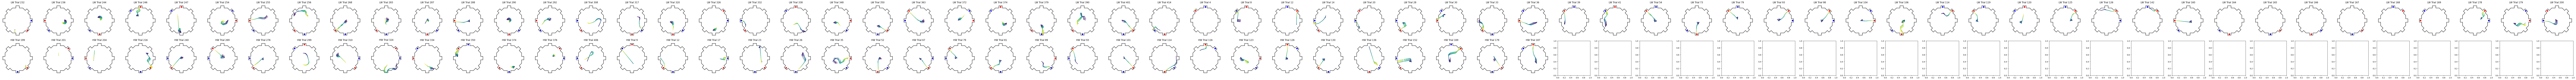

In [26]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Define trial index lists 
lw_trial_indices = bin_2_trial_indices_LW_45  
hw_trial_indices = bin_2_trial_indices_HW_45  

# Determine the number of trials to plot
num_trials = max(len(lw_trial_indices), len(hw_trial_indices))

# Subplots
fig, axes = plt.subplots(nrows=2, ncols=num_trials, figsize=(3 * num_trials, 6))

# Plot LW trials in first row
for col, trial_idx in enumerate(lw_trial_indices):
    trial = players_HL_LW_45_list[trial_idx]  
    this_trial = extract_trial.extract_trial(trial, players_HL_LW_45_list, trial_idx)
    ax = axes[0, col]
    plot_octagon.plot_octagon(ax=ax)
    plot_headangle_vectors_colour_map.plot_trial_headangle_vectors_colour_map(ax, trial=trial, player_id=1, cmap=mpl.cm.viridis)
    ax.set_title(f"LW Trial {trial_idx}")  

# Plot HW trials in second row
for col, trial_idx in enumerate(hw_trial_indices):
    trial = players_HL_HW_45_list[trial_idx] 
    this_trial = extract_trial.extract_trial(trial, players_HL_HW_45_list, trial_idx)
    ax = axes[1, col]
    plot_octagon.plot_octagon(ax=ax)
    plot_headangle_vectors_colour_map.plot_trial_headangle_vectors_colour_map(ax, trial=trial, player_id=1, cmap=mpl.cm.viridis)
    ax.set_title(f"HW Trial {trial_idx}") 
    
# Layout
plt.tight_layout()
plt.show()


In [10]:
trial_types = ['both', 'HW', 'LW']
angles = [45, 90, 180]

choice_lists = {}
high_wall_chosen_lists = {}

# Loop through each trial type and angle
for trial_type in trial_types:
    for angle in angles:
        HL_lists_key = f"players_HL_{trial_type}_{angle}_list"
        if HL_lists_key in players_HL_lists:
            for player_id in range(2):
                key_choice = f"choice_{trial_type}_{angle}_player_{player_id}"
                key_high = f"high_wall_chosen_{trial_type}_{angle}_player_{player_id}"
                choice_lists[key_choice] = wall_visibility_and_choice.get_player_wall_choice(players_HL_lists[HL_lists_key], player_id, inferred_choice=True, debug=True)
                high_wall_chosen_lists[key_high] = get_indices.was_given_wall_chosen(players_HL_lists[HL_lists_key], choice_lists[key_choice], 0)


/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/trajectory_analysis/trajectory_vectors.py:321: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:47: RuntimeWarning: Mean of empty slice
  return np.argmax(np.nanmean(cosine_similarity_trajectory, axis=1))
/Users/benny/Desktop/MSc/Project/Git/repos/main_copy/analysis/loser_inferred_choice.py:149: RuntimeWarning: Mean of empty slice
  highest_alignment_val = np.max(np.nanmean(cosine_similarity_trajectory, axis=1))


Time taken for player_wall_choice_win_or_loss (one session for one player) is 3.51
include loser's inferred choice status: True
player wall choices for this player: [ 6.  8.  6. nan  5.  6.  2.  2.  4.  2.  7.  4.  5.  7.  6.  1.  7. nan
  8.  6.  6.  3.  4.  5. nan  8.  5.  5.  7.  6.  1.  8.  1. nan  1.  8.
  3.  2.  3. nan  1.  6.  1.  4.  1.  7.  2.  2. nan nan  3. nan nan  5.
  2.  6.  6.  4. nan  5.  2.  8.  2.  6.  2.  8.  4.  6.  7.  4.  6.  4.
  8.  5.  6.  7.  1.  6.  5.  6.  7.  8.  8.  8.  8.  7.  6.  1.  6.  7.
  6. nan  6.  1.  3.  5.  6.  1.  5.  1.  7.  5.  7.  4.  2.  2.  7.  3.
  2.  5.  8.  1.  1. nan  5.  2.  7.  5.  3.  1. nan  5.  8.  8.  1.  2.
  3.  7.  3.  7.  1.  5.  4.  8.  7.  6.  4.  3. nan  4.  3.  4. nan nan
  2.  7.  2.  3.  6.  6.  7.  2.  8.  7.  3.  8.  7.  3.  3.  4.  2.  3.
  6.  1.  3.  5.  8.  5.  6.  1.  5. nan  2.  8.  6.  3.  3. nan  5.  3.
  2.  2.  1.  1. nan  2.  6.  6. nan  2.  3.  7.  4.  5.  7.  7.  4. nan
  6.  5.  3.  7.  3.  8.  6.  5.

In [11]:
probabilities_dict = {}
probabilities_list_dict = {}

for trial_type in trial_types:
    for angle in angles:
        bin_assignments_key = f"bin_assignments_{trial_type}_{angle}"

        if bin_assignments_key in bin_assignments:
            bin_assignments_lists = [bins_by_player[f"player_{player_id}_bins_{trial_type}_{angle}"] for player_id in range(2)]
            high_wall_chosen_lists_data = [high_wall_chosen_lists[f"high_wall_chosen_{trial_type}_{angle}_player_{player_id}"] for player_id in range(2)]

            key_prob = f"probabilities_list_{trial_type}_{angle}"
            key_dict = f"probabilities_{trial_type}_{angle}_dict"

            probabilities_dict[key_dict], probabilities_list_dict[key_prob] = calculate_probabilities_functions.calculate_high_wall_probabilities(
                bin_assignments_lists=bin_assignments_lists,
                high_wall_chosen_lists=high_wall_chosen_lists_data,
                debug=True
            )


[0.8984771573604061, 0.7743589743589744, 0.6309523809523809, 0.5, 0.5121951219512195, 0.5555555555555556, 0.6829268292682927, 0.7865168539325843]
Bin 1: 0.90 (True/Total = 177/197)
Bin 2: 0.77 (True/Total = 151/195)
Bin 3: 0.63 (True/Total = 53/84)
Bin 4: 0.50 (True/Total = 23/46)
Bin 5: 0.51 (True/Total = 21/41)
Bin 6: 0.56 (True/Total = 20/36)
Bin 7: 0.68 (True/Total = 28/41)
Bin 8: 0.79 (True/Total = 70/89)
[0.8, 0.7311827956989247, 0.4489795918367347, 0.19047619047619047, 0.4166666666666667, 0.23529411764705882, 0.5, 0.8421052631578947]
Bin 1: 0.80 (True/Total = 40/50)
Bin 2: 0.73 (True/Total = 68/93)
Bin 3: 0.45 (True/Total = 22/49)
Bin 4: 0.19 (True/Total = 4/21)
Bin 5: 0.42 (True/Total = 5/12)
Bin 6: 0.24 (True/Total = 4/17)
Bin 7: 0.50 (True/Total = 6/12)
Bin 8: 0.84 (True/Total = 16/19)
[1.0, 0.75, 0.6666666666666666, 0.2, 0.0, 0.0, 0.5, 0.75]
Bin 1: 1.00 (True/Total = 2/2)
Bin 2: 0.75 (True/Total = 6/8)
Bin 3: 0.67 (True/Total = 8/12)
Bin 4: 0.20 (True/Total = 1/5)
Bin 5: 0.0

In [12]:
overall_probabilities = {}

for trial_type in trial_types:
    for angle in angles:
        bin_assignments_key = f"bin_assignments_{trial_type}_{angle}"

        if bin_assignments_key in bin_assignments:
            bin_assignments_lists = [bins_by_player[f"player_{player_id}_bins_{trial_type}_{angle}"] for player_id in range(2)]
            high_wall_chosen_lists_data = [high_wall_chosen_lists[f"high_wall_chosen_{trial_type}_{angle}_player_{player_id}"] for player_id in range(2)]

            key_overall = f"overall_probability_{trial_type}_{angle}"

            overall_probabilities[key_overall] = calculate_probabilities_functions.calculate_p_high(
                bin_assignments_lists=bin_assignments_lists,
                high_wall_chosen_lists=high_wall_chosen_lists_data
            )


In [13]:
new_probabilities_list_dict = {}

for trial_type in trial_types:
    for angle in angles:
        key_prob = f"probabilities_list_{trial_type}_{angle}"
        key_overall = f"overall_probability_{trial_type}_{angle}"
        key_new_prob = f"new_probabilities_list_{trial_type}_{angle}"

        if key_prob in probabilities_list_dict and key_overall in overall_probabilities:
            new_probabilities_list_dict[key_new_prob] = [
                probability - overall_probabilities[key_overall] for probability in probabilities_list_dict[key_prob]
            ]

In [14]:
bin_ranges = headangle_bin_assignment_new.define_45_degree_bins()

Plotting both walls visible first
1)45
2)90
3)180
All High-Low
